In [ ]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.display.max_columns=100
pd.options.display.max_rows=100

# 1. Reading and Understanding the Data

In [ ]:
cars = pd.read_csv('/content/CarPrice_Assignment.csv')

In [ ]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.shape

(205, 26)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
cars.describe(include = 'O')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


# 2. Data Cleaning and Preparation

In [ ]:
#Splitting company name from CarName column
CompanyName = cars['CarName'].apply(lambda x : x.split(' ')[0])
cars.insert(3,'CompanyName',CompanyName)
cars.drop(['CarName'], axis=1,inplace=True)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [ ]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [ ]:
cars.loc[cars['CompanyName']=='vw',['CompanyName']] = 'volkswagen'

In [ ]:
cars.loc[cars['CompanyName']=='vokswagen',['CompanyName']] = 'volkswagen'

In [ ]:
cars.loc[cars['CompanyName']=='toyouta',['CompanyName']] = 'toyota'

In [ ]:
cars.loc[cars['CompanyName']=='saab',['CompanyName']] = 'subaru'

In [ ]:
cars.loc[cars['CompanyName']=='porcshce',['CompanyName']] = 'porsche'

In [ ]:
cars.loc[cars['CompanyName']=='nissan',['CompanyName']] = 'Nissan'

In [ ]:
cars.loc[cars['CompanyName']=='maxda',['CompanyName']] = 'mazda'

In [ ]:
cars.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'subaru',
       'toyota', 'volkswagen', 'volvo'], dtype=object)

In [ ]:
O_cars =  cars.select_dtypes(include = 'O')
O_cars

,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
0,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
1,alfa-romero,gas,std,two,convertible,rwd,front,dohc,four,mpfi
2,alfa-romero,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi
3,audi,gas,std,four,sedan,fwd,front,ohc,four,mpfi
4,audi,gas,std,four,sedan,4wd,front,ohc,five,mpfi
...,...,...,...,...,...,...,...,...,...,...
200,volvo,gas,std,four,sedan,rwd,front,ohc,four,mpfi
201,volvo,gas,turbo,four,sedan,rwd,front,ohc,four,mpfi
202,volvo,gas,std,four,sedan,rwd,front,ohcv,six,mpfi
203,volvo,diesel,turbo,four,sedan,rwd,front,ohc,six,idi


In [ ]:
for i in O_cars.columns:
    print(O_cars[i].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'subaru' 'toyota' 'volkswagen' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [ ]:
cars.loc[cars['enginetype']=='dohcv',['enginetype']] = 'dohc'

In [ ]:
cars.loc[cars['enginetype']=='ohcv',['enginetype']] = 'ohc'

In [ ]:
for i in O_cars.columns:
    print(cars[i].unique())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'Nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'subaru' 'toyota' 'volkswagen' 'volvo']
['gas' 'diesel']
['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohc' 'l' 'rotor' 'ohcf']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


In [ ]:
cars.CompanyName.value_counts()

toyota         32
subaru         18
Nissan         18
mazda          17
honda          13
mitsubishi     13
volkswagen     12
volvo          11
peugeot        11
dodge           9
bmw             8
buick           8
audi            7
plymouth        7
porsche         5
isuzu           4
alfa-romero     3
jaguar          3
chevrolet       3
renault         2
mercury         1
Name: CompanyName, dtype: int64

In [ ]:
cars.nunique()

car_ID              205
symboling             6
CompanyName          21
fueltype              2
aspiration            2
doornumber            2
carbody               5
drivewheel            3
enginelocation        2
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginetype            5
cylindernumber        7
enginesize           44
fuelsystem            8
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

In [ ]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


### Inference
 There are no duplicated values in the dataset.

In [ ]:
cars.drop('compressionratio',axis =1, inplace = True)

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   car_ID          205 non-null    int64  
 1   symboling       205 non-null    int64  
 2   CompanyName     205 non-null    object 
 3   fueltype        205 non-null    object 
 4   aspiration      205 non-null    object 
 5   doornumber      205 non-null    object 
 6   carbody         205 non-null    object 
 7   drivewheel      205 non-null    object 
 8   enginelocation  205 non-null    object 
 9   wheelbase       205 non-null    float64
 10  carlength       205 non-null    float64
 11  carwidth        205 non-null    float64
 12  carheight       205 non-null    float64
 13  curbweight      205 non-null    int64  
 14  enginetype      205 non-null    object 
 15  cylindernumber  205 non-null    object 
 16  enginesize      205 non-null    int64  
 17  fuelsystem      205 non-null    obj

In [ ]:
#l=[9,10,11,16,19,21,22,23,24]
#def Outlier(df):
 #   for column in df.iloc[:,l].columns:
  #      if df[column].dtype!='str':
   #         Q1=df[column].quantile(0.25)
    #        Q3=df[column].quantile(0.75)
     #       IQR= Q3-Q1
      #      lower=Q1-(1.5* IQR)
       #     upper=Q3+(1.5* IQR)
        #    df.loc[:,column] =np.where(df[column].values>upper,upper,df[column].values)
         #   df.loc[:,column] =np.where(df[column].values<lower,lower,df[column].values)
    #return df

#cars=Outlier(cars)
#print(cars.columns)
#print(cars.head())

# 3. Visualizing the data

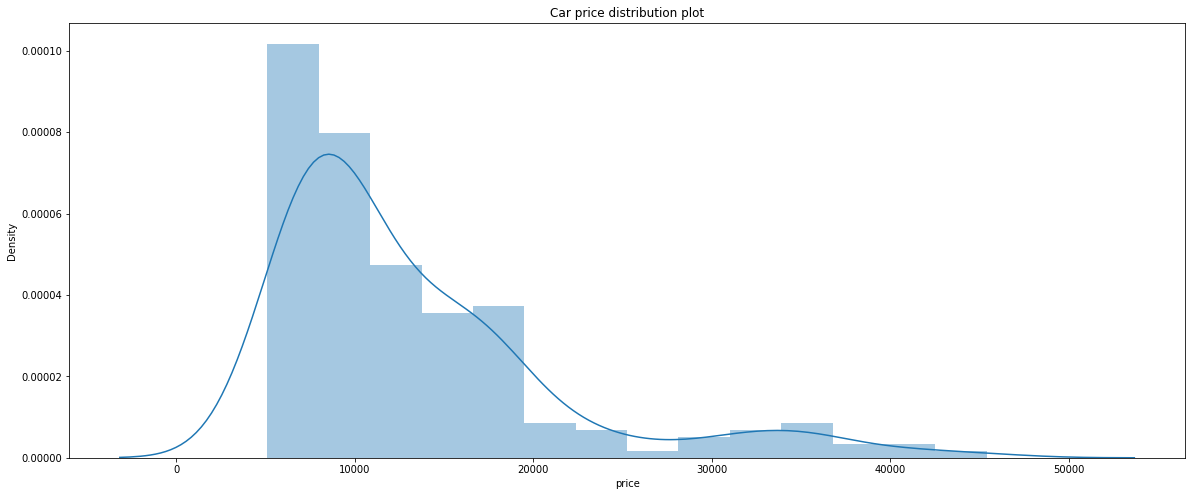

In [ ]:
plt.figure(figsize=(20,8))

plt.title('Car price distribution plot')
sns.distplot(cars.price)

## 3.1 Visualizing Categorical Data

In [ ]:
cars.select_dtypes(include = ['object']).columns.tolist()

['CompanyName',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem']

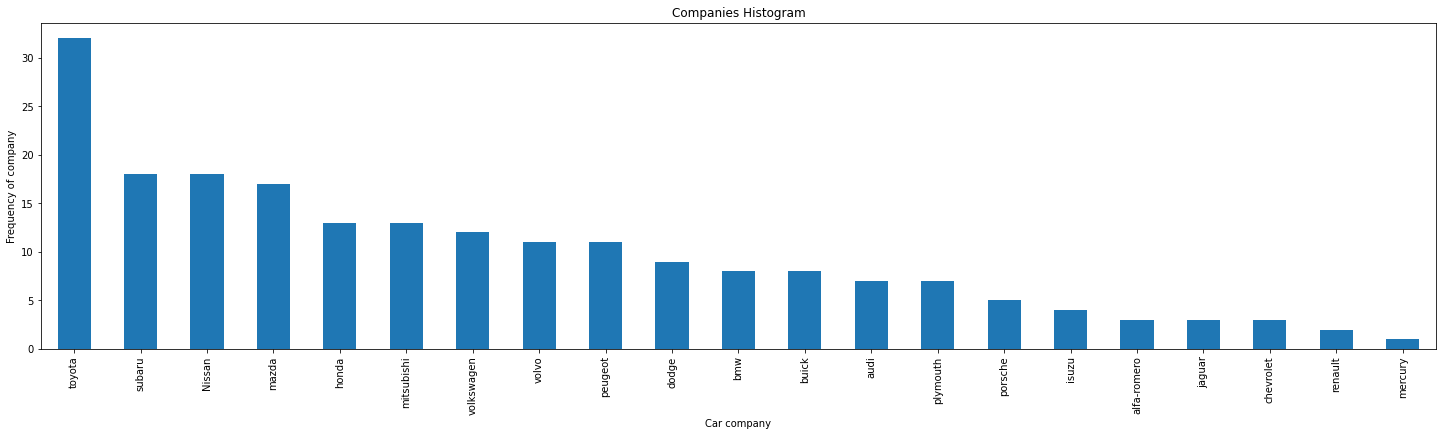

In [ ]:
plt.figure(figsize = (25, 6))
plt1 = cars.CompanyName.value_counts().plot(kind ='bar')
plt.title('Companies Histogram')
plt1.set(xlabel = 'Car company', ylabel = 'Frequency of company')
plt.show()

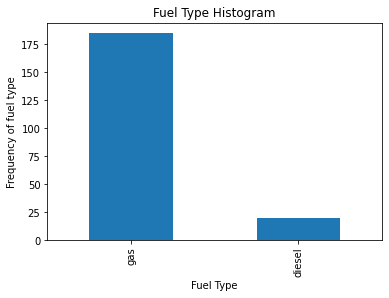

In [ ]:
plt1 = cars.fueltype.value_counts().plot(kind = 'bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')
plt.show()

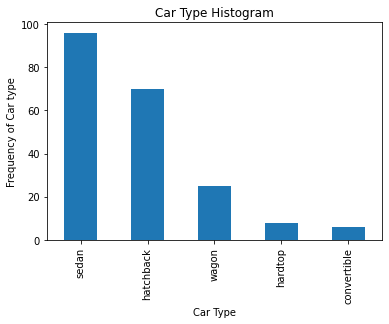

In [ ]:
plt1 = cars.carbody.value_counts().plot(kind = 'bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')
plt.show()

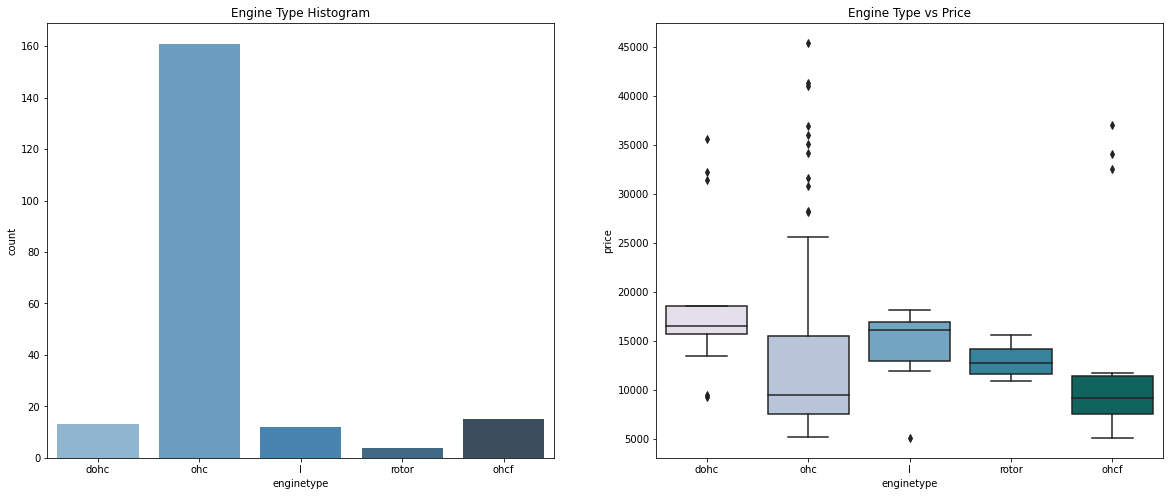

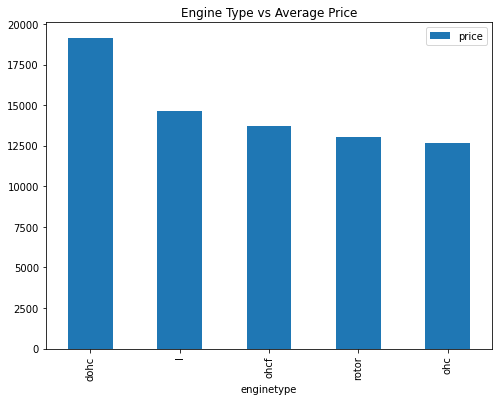

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Engine Type Histogram')
sns.countplot(cars.enginetype, palette=("Blues_d"))

plt.subplot(1,2,2)
plt.title('Engine Type vs Price')
sns.boxplot(x=cars.enginetype, y=cars.price, palette=("PuBuGn"))

plt.show()

df = pd.DataFrame(cars.groupby(['enginetype'])['price'].mean().sort_values(ascending = False))
df.plot.bar(figsize=(8,6))
plt.title('Engine Type vs Average Price')
plt.show()

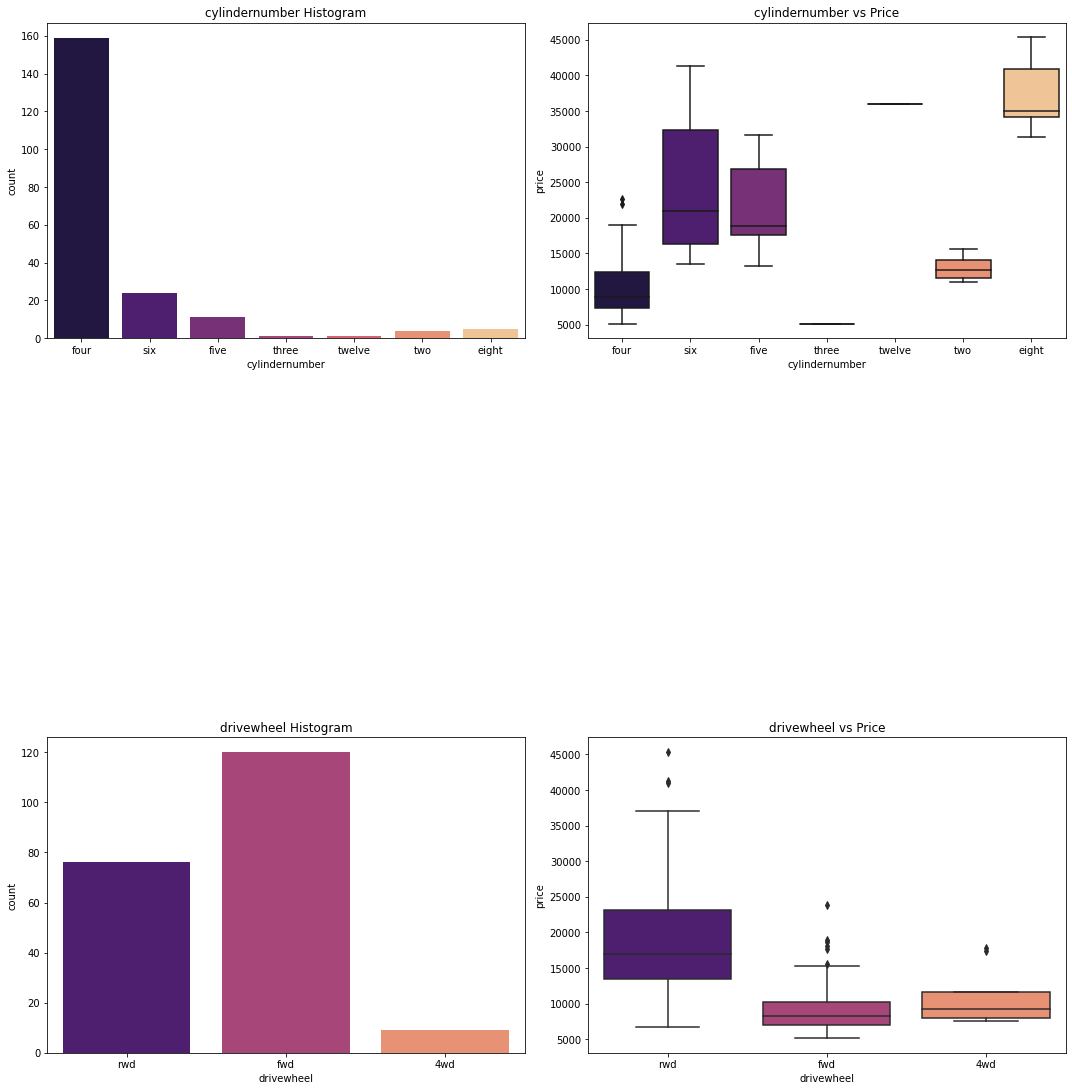

In [ ]:
def plot_count(x,fig):
    plt.subplot(4,2,fig)
    plt.title(x+' Histogram')
    sns.countplot(cars[x],palette=("magma"))
    plt.subplot(4,2,(fig+1))
    plt.title(x+' vs Price')
    sns.boxplot(x=cars[x], y=cars.price, palette=("magma"))

plt.figure(figsize=(15,20))

plot_count('cylindernumber', 3)
plot_count('drivewheel', 7)

plt.tight_layout()

## 3.2 Visualizing Numerical Data

In [ ]:
cars.select_dtypes(include = ['int64', 'float64']).columns.tolist()

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'enginesize',
 'boreratio',
 'stroke',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

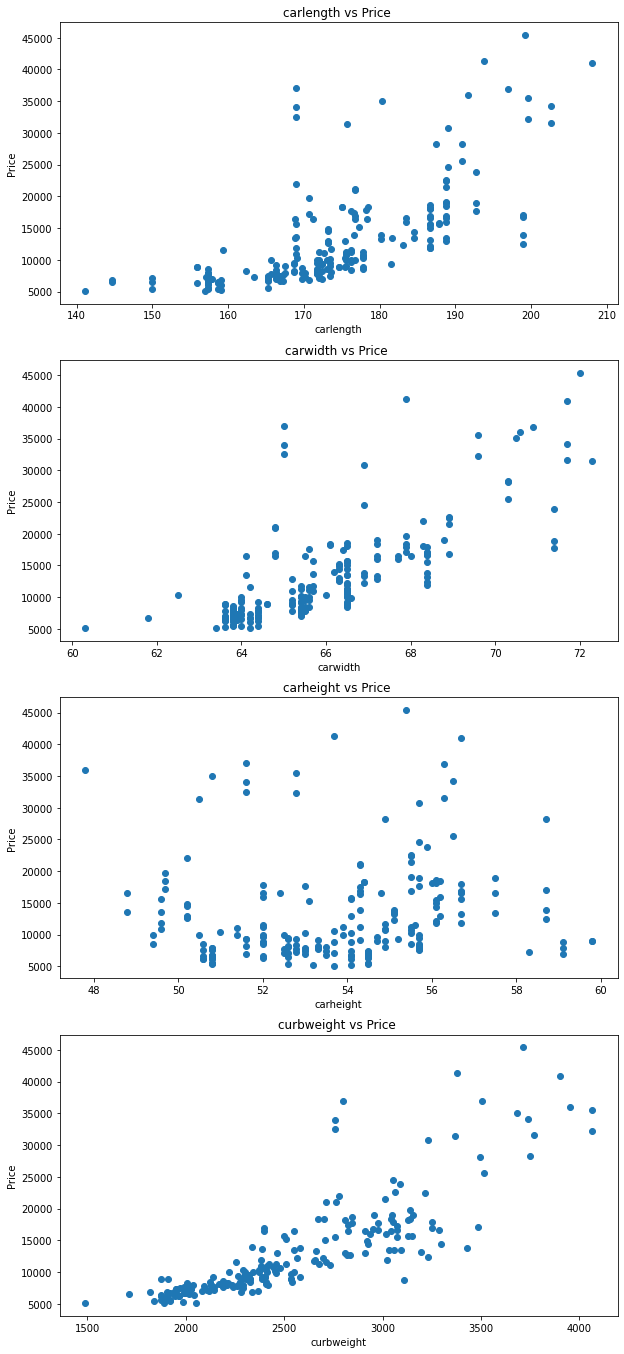

In [ ]:
def scatter(x, fig):
    plt.subplot(5,1,fig)
    plt.scatter(cars[x], cars['price'])
    plt.title(x+' vs Price ')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize = (10,30))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)

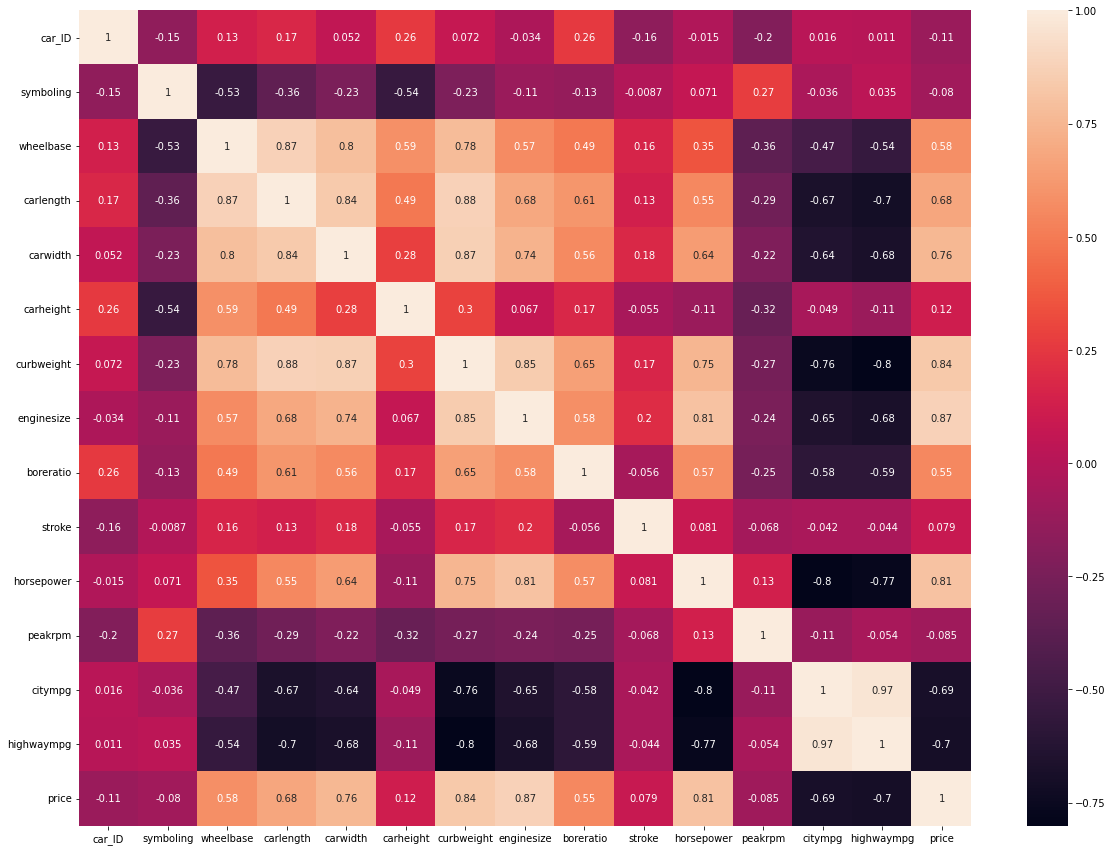

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(cars.corr(), annot = True  )

## 4. Deriving New Features

In [ ]:
# Fuel Econony
cars['fueleconomy'] = (0.55 * cars['citympg']) + (0.45 * cars['highwaympg'])

In [ ]:
# Binning the car companies based on acg prices of each company
cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['CompanyName'])['price'].mean()
temp = temp.merge(table.reset_index(), how ='left',on= 'CompanyName')
bins = [0,10000,20000,40000]
cars_bin = ['Budget', 'Medium', 'Highend']
cars['carsrange'] = pd.cut(temp['price_y'], bins,right = False, labels=cars_bin)
cars.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,horsepower,peakrpm,citympg,highwaympg,price,fueleconomy,carsrange
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,111,5000,21,27,13495,23.70,Medium
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,111,5000,21,27,16500,23.70,Medium
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohc,six,152,mpfi,2.68,3.47,154,5000,19,26,16500,22.15,Medium
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,102,5500,24,30,13950,26.70,Medium
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,115,5500,18,22,17450,19.80,Medium


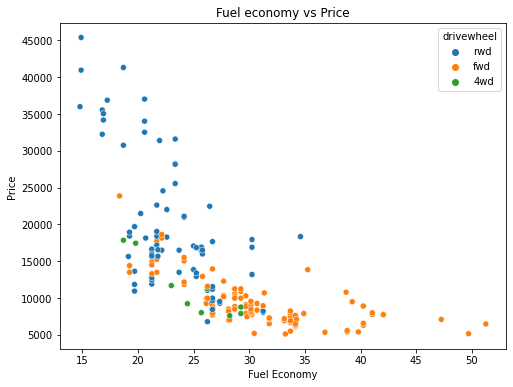

<Figure size 432x288 with 0 Axes>

In [ ]:
#Visualizing New Features
plt.figure(figsize=(8,6))

plt.title('Fuel economy vs Price')
sns.scatterplot(x = cars['fueleconomy'],y=cars['price'], hue=cars['drivewheel'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')

plt.show()
plt.tight_layout()

<Figure size 1800x720 with 0 Axes>

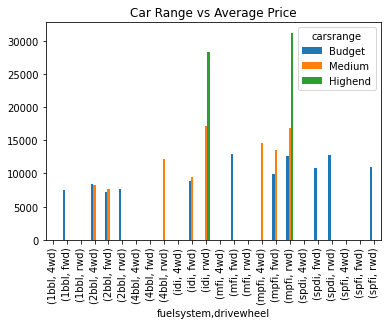

In [ ]:
plt.figure(figsize=(25,10))
df = pd.DataFrame(cars.groupby(['fuelsystem','drivewheel','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

## List of significant variables after Visual Analysis
- Car range
- Engine Type
- Fuel Type
- Car Body
- Aspiration
- Cylinder Number
- Drivewheel
- Curbweight
- Car Length
- Car width
- Engine Size
- Boreratio
- Horse Power
- Wheel base
- Fuel Economy

In [ ]:
cars_lr = cars[['price', 'fueltype', 'aspiration','carbody', 'drivewheel','wheelbase',
                  'curbweight', 'enginetype', 'cylindernumber', 'enginesize', 'boreratio','horsepower',
                    'fueleconomy', 'carlength','carwidth', 'carsrange']]
cars_lr.head()

,price,fueltype,aspiration,carbody,drivewheel,wheelbase,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,carsrange
0,13495,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
1,16500,gas,std,convertible,rwd,88.6,2548,dohc,four,130,3.47,111,23.70,168.8,64.1,Medium
2,16500,gas,std,hatchback,rwd,94.5,2823,ohc,six,152,2.68,154,22.15,171.2,65.5,Medium
3,13950,gas,std,sedan,fwd,99.8,2337,ohc,four,109,3.19,102,26.70,176.6,66.2,Medium
4,17450,gas,std,sedan,4wd,99.4,2824,ohc,five,136,3.19,115,19.80,176.6,66.4,Medium


In [ ]:
cars_lr.shape

(205, 16)

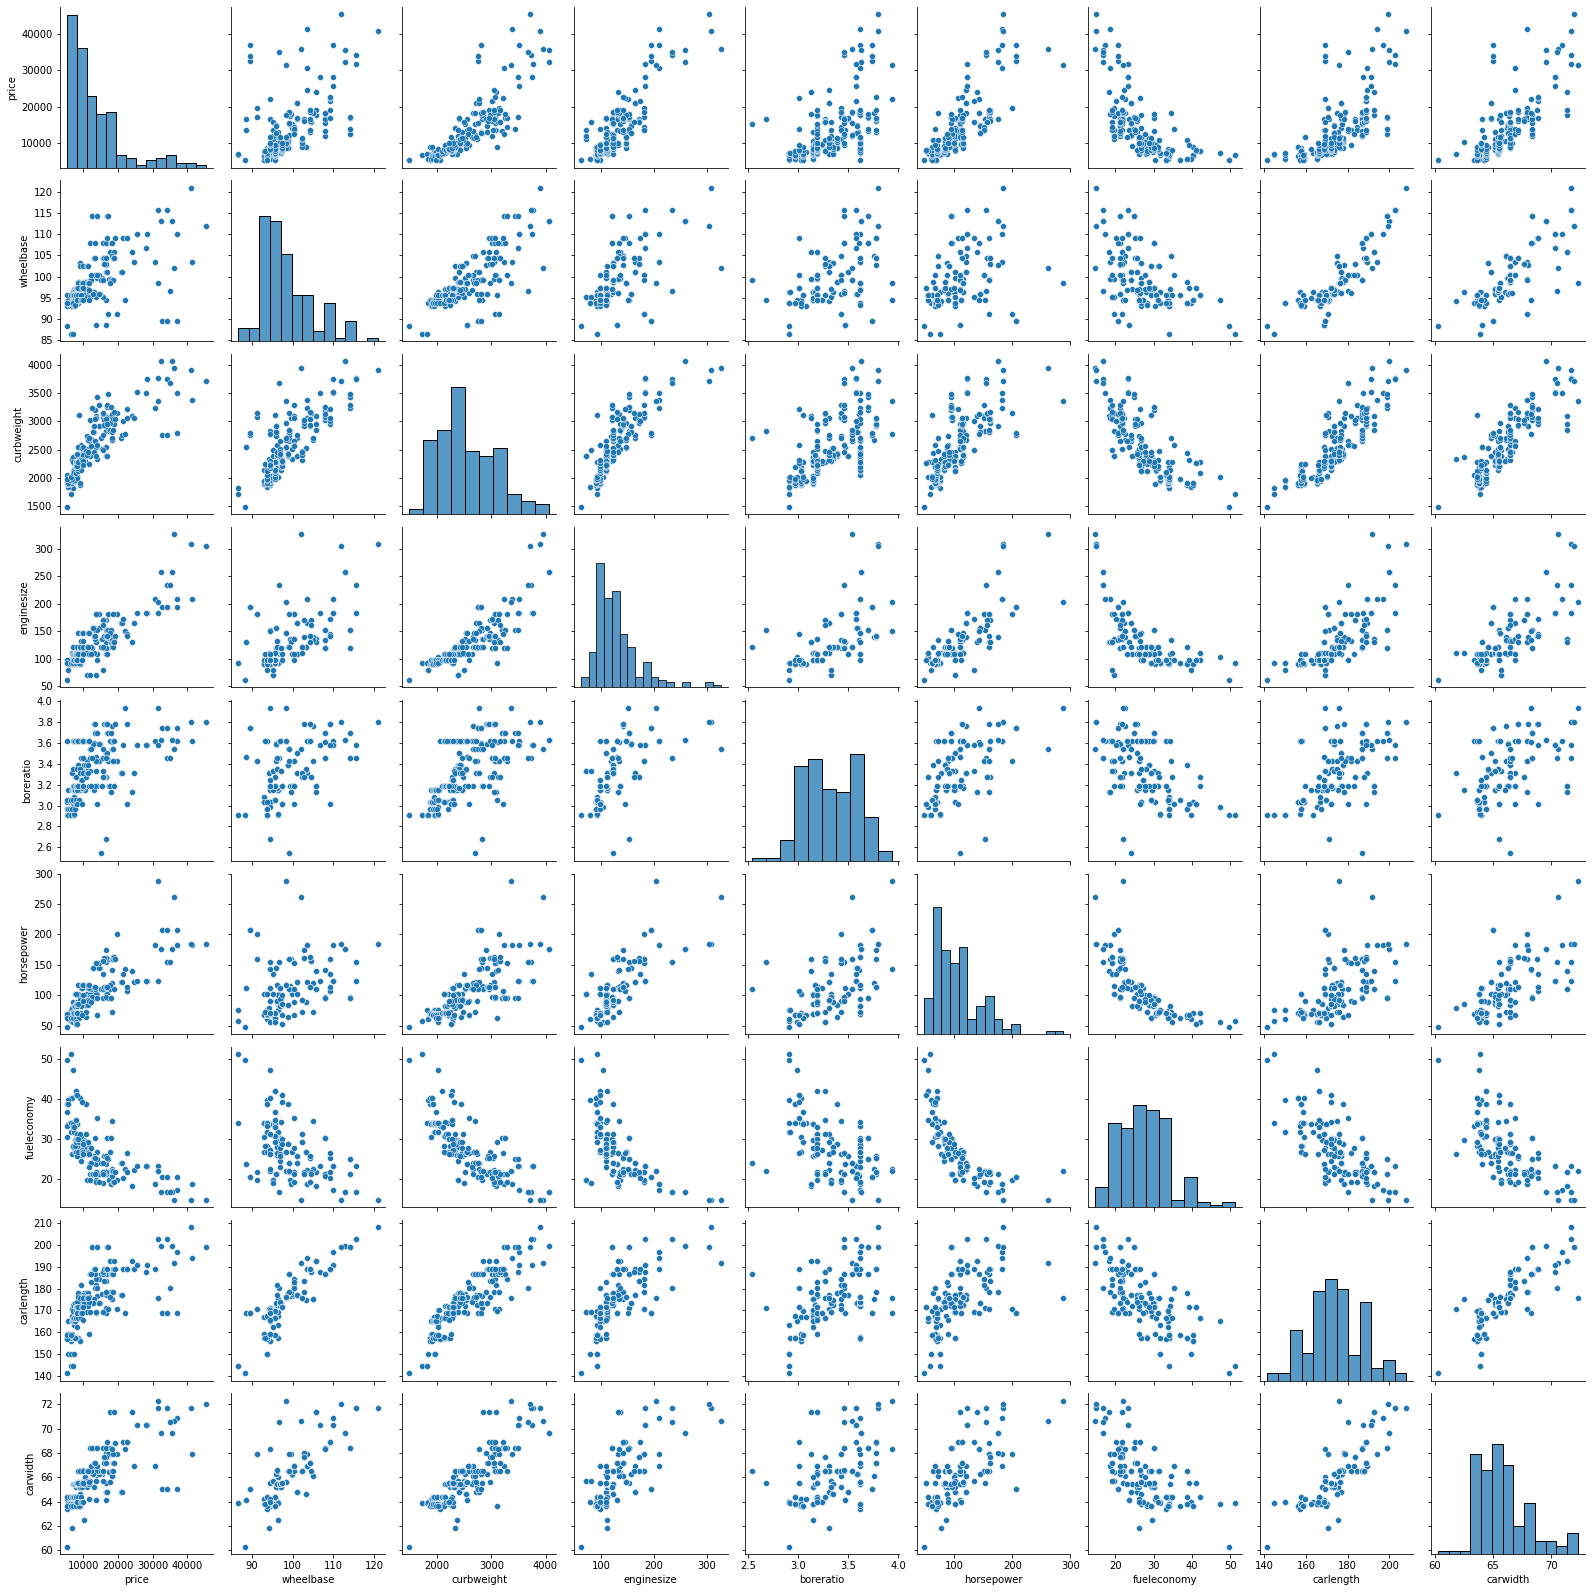

In [ ]:
sns.pairplot(cars_lr)
plt.show()

## 6. Dummy Varaibles

In [ ]:
dcars = pd.get_dummies(cars_lr)

In [ ]:
dcars

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Budget,carsrange_Medium,carsrange_Highend
0,13495,88.6,2548,130,3.47,111,23.70,168.8,64.1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,16500,88.6,2548,130,3.47,111,23.70,168.8,64.1,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,16500,94.5,2823,152,2.68,154,22.15,171.2,65.5,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
3,13950,99.8,2337,109,3.19,102,26.70,176.6,66.2,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
4,17450,99.4,2824,136,3.19,115,19.80,176.6,66.4,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845,109.1,2952,141,3.78,114,25.25,188.8,68.9,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
201,19045,109.1,3049,141,3.78,160,21.70,188.8,68.8,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
202,21485,109.1,3012,173,3.58,134,20.25,188.8,68.9,0,1,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
203,22470,109.1,3217,145,3.01,106,26.45,188.8,68.9,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0


In [ ]:
dcars.shape

(205, 36)

## 7. Train-Test Split and feature scaling

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(dcars, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'curbweight', 'enginesize', 'boreratio', 'horsepower','fueleconomy','carlength','carwidth','price']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [ ]:
df_train.head()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Budget,carsrange_Medium,carsrange_Highend
122,0.068818,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
125,0.466890,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
166,0.122110,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0.314446,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
199,0.382131,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
df_train.describe()

,price,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Budget,carsrange_Medium,carsrange_Highend
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.219309,0.411141,0.407878,0.241351,0.497946,0.227302,0.358265,0.525476,0.461655,0.090909,0.909091,0.818182,0.181818,0.027972,0.020979,0.342657,0.475524,0.132867,0.055944,0.594406,0.349650,0.076923,0.062937,0.748252,0.083916,0.027972,0.020979,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.391608,0.489510,0.118881
std,0.215682,0.205581,0.211269,0.154619,0.207140,0.165511,0.185980,0.204848,0.184517,0.288490,0.288490,0.387050,0.387050,0.165472,0.143818,0.476266,0.501156,0.340624,0.230621,0.492733,0.478536,0.267406,0.243703,0.435543,0.278236,0.165472,0.143818,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.489826,0.501647,0.324786
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.067298,0.272414,0.245539,0.135849,0.305556,0.091667,0.198903,0.399187,0.304167,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.140343,0.341379,0.355702,0.184906,0.500000,0.191667,0.344307,0.502439,0.425000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.313479,0.503448,0.559542,0.301887,0.682540,0.283333,0.512346,0.669919,0.550000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


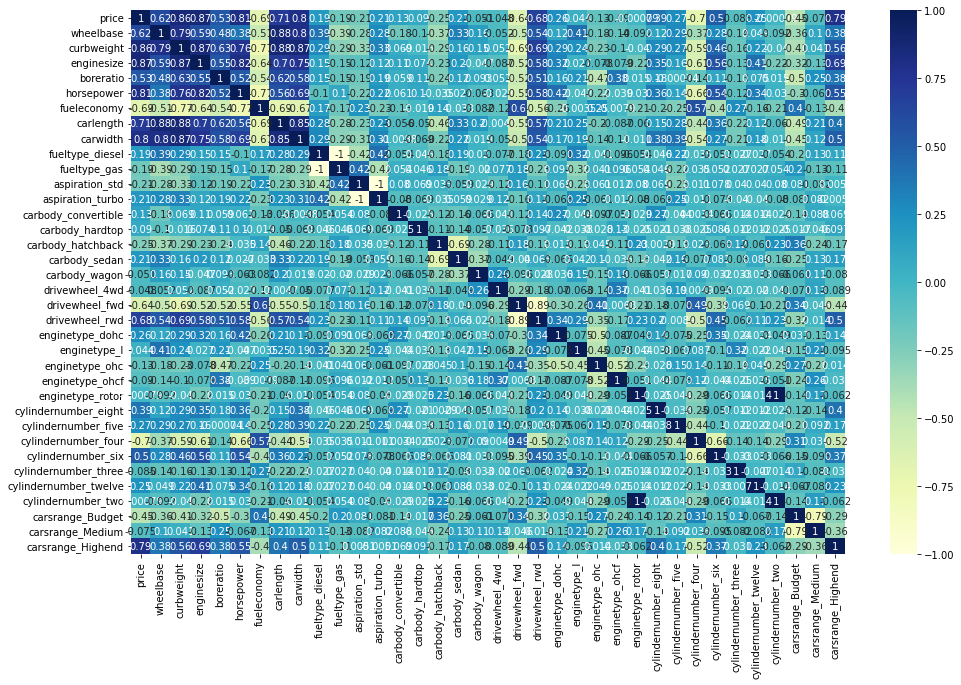

In [ ]:
plt.figure(figsize = (16,10))
sns.heatmap(df_train.corr(), annot = True, cmap='YlGnBu')
plt.show()

## 8. Model Building

In [ ]:
#RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143 entries, 122 to 8
Data columns (total 36 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   price                  143 non-null    float64
 1   wheelbase              143 non-null    float64
 2   curbweight             143 non-null    float64
 3   enginesize             143 non-null    float64
 4   boreratio              143 non-null    float64
 5   horsepower             143 non-null    float64
 6   fueleconomy            143 non-null    float64
 7   carlength              143 non-null    float64
 8   carwidth               143 non-null    float64
 9   fueltype_diesel        143 non-null    uint8  
 10  fueltype_gas           143 non-null    uint8  
 11  aspiration_std         143 non-null    uint8  
 12  aspiration_turbo       143 non-null    uint8  
 13  carbody_convertible    143 non-null    uint8  
 14  carbody_hardtop        143 non-null    uint8  
 15  carbod

In [ ]:
X = df_train.drop(['price'],axis=1)
y = df_train['price']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 42)

In [ ]:
X

,wheelbase,curbweight,enginesize,boreratio,horsepower,fueleconomy,carlength,carwidth,fueltype_diesel,fueltype_gas,aspiration_std,aspiration_turbo,carbody_convertible,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_4wd,drivewheel_fwd,drivewheel_rwd,enginetype_dohc,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_rotor,cylindernumber_eight,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,carsrange_Budget,carsrange_Medium,carsrange_Highend
122,0.244828,0.272692,0.139623,0.230159,0.083333,0.530864,0.426016,0.291667,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
125,0.272414,0.500388,0.339623,1.000000,0.395833,0.213992,0.452033,0.666667,0,1,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1
166,0.272414,0.314973,0.139623,0.444444,0.266667,0.344307,0.448780,0.308333,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0
1,0.068966,0.411171,0.260377,0.626984,0.262500,0.244170,0.450407,0.316667,0,1,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0
199,0.610345,0.647401,0.260377,0.746032,0.475000,0.122085,0.775610,0.575000,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.334483,0.354926,0.184906,0.388889,0.283333,0.311385,0.508943,0.425000,0,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0
103,0.475862,0.609775,0.452830,0.595238,0.433333,0.189300,0.707317,0.516667,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
67,0.806897,0.786268,0.460377,0.714286,0.312500,0.234568,0.809756,0.833333,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1
24,0.244828,0.185803,0.109434,0.230159,0.083333,0.530864,0.263415,0.291667,0,1,1,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0


# Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)
r2_score_test = r2_score(y_test_pred,y_test)

In [ ]:
print('mse=',mse,'\n','rmse=',rmse,'\n','r2_score_test=',r2_score_test)

mse= 0.006674155749587446 
 rmse= 0.08169550629984153 
 r2_score_test= 0.8670902530153716


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)
r2_score_train = r2_score(y_train_pred,y_train)
print('mse=',mse, '\n', 'rmse=',rmse ,'\n', 'r2=',r2_score_train)

mse= 0.002376590392915546 
 rmse= 0.048750286080345685 
 r2= 0.9458249795614053


# Since there is slight overfitting, we will do regularization tecnique!

# Ridge Regularization

In [ ]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.model_selection import train_test_split, cross_val_score
from statistics import mean
# List to maintain the different cross-validation scores
cross_val_scores_ridge = []

# List to maintain the different values of alpha
alpha = []

# Loop to compute the different values of cross-validation scores
for i in range(1, 9):
    ridgeModel = Ridge(alpha = i * 0.25)
    ridgeModel.fit(X_train, y_train)
    scores = cross_val_score(ridgeModel, X, y, cv = 10)
    avg_cross_val_score = mean(scores)*100
    cross_val_scores_ridge.append(avg_cross_val_score)
    alpha.append(i * 0.25)

# Loop to print the different values of cross-validation scores
for i in range(0, len(alpha)):
    print(str(alpha[i])+' : '+str(cross_val_scores_ridge[i]))

0.25 : 87.5050027546135
0.5 : 87.64884835184539
0.75 : 87.65754564598365
1.0 : 87.639796849339
1.25 : 87.61187442976292
1.5 : 87.57719887266194
1.75 : 87.53673861040474
2.0 : 87.4909500934607


In [ ]:
# Building and fitting the Ridge Regression model
ridgeModelChosen = Ridge(alpha = 0.75)
ridgeModelChosen.fit(X_train, y_train)

# Evaluating the Ridge Regression model
print(ridgeModelChosen.score(X_test, y_test))

0.9065399879392044


In [ ]:
y_test_pred = ridgeModelChosen.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)
r2_score_test = r2_score(y_test_pred,y_test)
print('mse=',mse,'\n','rmse=',rmse,'\n','r2_score_test=',r2_score_test)

mse= 0.004305400814585972 
 rmse= 0.0656155531454698 
 r2_score_test= 0.8905940279149781


In [ ]:
y_train_pred = ridgeModelChosen.predict(X_train)
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)
r2_score_train = r2_score(y_train_pred,y_train)
print('mse=',mse, '\n', 'rmse=',rmse ,'\n', 'r2=',r2_score_train)

mse= 0.003190323181969883 
 rmse= 0.05648294593919374 
 r2= 0.9222742863585802


# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_test_pred = lr.predict(X_test)
y_train_pred = lr.predict(X_train)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test_pred,y_test)
rmse = np.sqrt(mse)
r2_score_test = r2_score(y_test_pred,y_test)
print('mse=',mse,'\n','rmse=',rmse,'\n','r2_score_test=',r2_score_test)

mse= 0.006674155749587446 
 rmse= 0.08169550629984153 
 r2_score_test= 0.8670902530153716


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_train_pred,y_train)
rmse = np.sqrt(mse)
r2_score_train = r2_score(y_train_pred,y_train)
print('mse=',mse, '\n', 'rmse=',rmse ,'\n', 'r2=',r2_score_train)

mse= 0.002376590392915546 
 rmse= 0.048750286080345685 
 r2= 0.9458249795614053


# Conclusion:
 ### Here we can infer that Ridge Regularization model is the best model for Car_price_prediction compared to others and having RMSE is 5.64 and Accuracy of training data is 92%.